# Part 2 : Female Employment Data Analysis


In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [3]:
# Read csv 
csv_file_path = '../Resources/employment_Influencing factors (thousands).csv'
employment_df = pd.read_csv(csv_file_path)
employment_df

,ref_area.label,sex.label,classif1.label,classif2.label,time,obs_value
0,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1710.337
1,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,316.510
2,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1393.827
3,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,636.501
4,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,88.431
...,...,...,...,...,...,...
258686,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [4]:
# Rename columns 
new_column_names = {'ref_area.label': 'country', 'sex.label': 'gender', 'classif1.label':'education_level', 'classif2.label':'marital_status', 'time':'year','obs_value':'employee_count_thousands'}
employment_df.rename(columns=new_column_names, inplace=True)
employment_df.head()



,country,gender,education_level,marital_status,year,employee_count_thousands
0,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1710.337
1,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,316.510
2,Afghanistan,Sex: Total,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1393.827
3,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,636.501
4,Afghanistan,Sex: Total,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,88.431


In [5]:
# Get the unique country 
unique_country = employment_df['country'].unique()
unique_country
len(unique_country)

154

In [6]:
# Remove non-country data 
non_countries = ['"Cook Islands," "Micronesia, Federated States of," "Hong Kong, China," "Kosovo," "Occupied Palestinian Territory," "Niue," "Tokelau," "Wallis and Futuna Islands"']
employment_df = employment_df[~employment_df['country'].isin(non_countries)]

In [7]:
# Drop 'Sex:Total' from gender column, this project only compareing the unemployment rate by gender 
employment_df = employment_df[employment_df['gender'] != 'Sex: Total']
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Sex: Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Sex: Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Sex: Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686
...,...,...,...,...,...,...
258686,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Sex: Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Sex: Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [8]:
# Simplify 'gender' column : keep the format as 'male', 'female'
employment_df['gender'] = employment_df['gender'].str.replace('Sex: ', '')
employment_df.head()

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686


In [9]:
# Drop 'Sex:Other' from gender column
employment_df = employment_df[employment_df['gender'] != 'Other']
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
18,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Total,2021,1614.053
19,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Single / Widowed /...,2021,284.665
20,Afghanistan,Male,Education (Aggregate levels): Total,Marital status (Aggregate): Married / Union / ...,2021,1329.388
21,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Total,2021,602.810
22,Afghanistan,Male,Education (Aggregate levels): Less than basic,Marital status (Aggregate): Single / Widowed /...,2021,72.686
...,...,...,...,...,...,...
258686,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [10]:
# Clean the column of education_level
employment_df = employment_df[~employment_df['education_level'].str.contains("Total")]
employment_df = employment_df[~employment_df['education_level'].str.contains("Aggregate levels")]

employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
171,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Total,2021,602.810
172,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Single / Widowed /...,2021,72.686
173,Afghanistan,Male,Education (ISCED-11): X. No schooling,Marital status (Aggregate): Married / Union / ...,2021,530.124
174,Afghanistan,Male,Education (ISCED-11): 1. Primary education,Marital status (Aggregate): Total,2021,167.858
175,Afghanistan,Male,Education (ISCED-11): 1. Primary education,Marital status (Aggregate): Single / Widowed /...,2021,36.889
...,...,...,...,...,...,...
258686,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,Education (ISCED-97): 5. First stage of tertia...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,Education (ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [11]:
# Simplify 'education_level' column : remove "Education" for all rows
employment_df['education_level'] = employment_df['education_level'].str.replace('Education ', '')
employment_df



,country,gender,education_level,marital_status,year,employee_count_thousands
171,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Total,2021,602.810
172,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Single / Widowed /...,2021,72.686
173,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Aggregate): Married / Union / ...,2021,530.124
174,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Aggregate): Total,2021,167.858
175,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Aggregate): Single / Widowed /...,2021,36.889
...,...,...,...,...,...,...
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Divorced or legally...,2014,2.229
258688,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Total,2014,NaN
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [12]:
# Clean the column of marital_status
employment_df = employment_df[~employment_df['marital_status'].str.contains("Total")]
employment_df = employment_df[~employment_df['marital_status'].str.contains("Aggregate")]

employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Marital status (Detailed): Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Marital status (Detailed): Single,2021,36.889
...,...,...,...,...,...,...
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Marital status (Detailed): Divorced or legally...,2014,2.229
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Marital status (Detailed): Married,2014,NaN


In [13]:
# Simplify 'marital_status' column : remove "Marital status (Detailed)" for all rows
employment_df['marital_status'] = employment_df['marital_status'].str.split(': ').str[1]
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Divorced or legally separated,2014,2.229
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Married,2014,NaN


In [14]:
# Remove 'Not elsewhere classified' from column ['marital_status']
employment_df= employment_df[employment_df['marital_status'] != 'Not elsewhere classified']
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761
258687,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Divorced or legally separated,2014,2.229
258689,Zimbabwe,Female,(ISCED-97): Level not stated,Married,2014,NaN


In [15]:
# Drop all rows with any NaN values
employment_df = employment_df.dropna()
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258681,Zimbabwe,Female,(ISCED-97): 3. Upper secondary education,Divorced or legally separated,2014,15.878
258684,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Single,2014,6.510
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761


In [16]:
# Drop rows where employee_count_thousands is 0
employment_df = employment_df[employment_df['employee_count_thousands'] != 0]
employment_df

,country,gender,education_level,marital_status,year,employee_count_thousands
277,Afghanistan,Male,(ISCED-11): X. No schooling,Single,2021,69.567
278,Afghanistan,Male,(ISCED-11): X. No schooling,Married,2021,517.679
279,Afghanistan,Male,(ISCED-11): X. No schooling,Union / Cohabiting,2021,12.445
280,Afghanistan,Male,(ISCED-11): X. No schooling,Widowed,2021,3.119
282,Afghanistan,Male,(ISCED-11): 1. Primary education,Single,2021,36.889
...,...,...,...,...,...,...
258681,Zimbabwe,Female,(ISCED-97): 3. Upper secondary education,Divorced or legally separated,2014,15.878
258684,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Single,2014,6.510
258685,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Married,2014,21.816
258686,Zimbabwe,Female,(ISCED-97): 5. First stage of tertiary educati...,Widowed,2014,1.761


In [40]:
employment_df.to_csv('employment_cleaned.csv', index=False)


In [24]:
employment_df["year"].min()

2013

## Building and Evaluating a Linear Regression Model

In [17]:
# filter the DF for only female data 
female_employment_df = employment_df[employment_df['gender'] == 'Female']
female_employment_df.drop('gender', axis=1, inplace=True)
female_employment_df.head()

d:\1\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,education_level,marital_status,year,employee_count_thousands
321,Afghanistan,(ISCED-11): X. No schooling,Married,2021,16.781
323,Afghanistan,(ISCED-11): X. No schooling,Widowed,2021,14.066
333,Afghanistan,(ISCED-11): 3. Upper secondary education,Single,2021,1.208
338,Afghanistan,(ISCED-11): 4. Post-secondary non-tertiary edu...,Single,2021,6.231
339,Afghanistan,(ISCED-11): 4. Post-secondary non-tertiary edu...,Married,2021,13.535


In [18]:
print(female_employment_df.head())
print(female_employment_df.dtypes)

         country                                    education_level  \
321  Afghanistan                        (ISCED-11): X. No schooling   
323  Afghanistan                        (ISCED-11): X. No schooling   
333  Afghanistan           (ISCED-11): 3. Upper secondary education   
338  Afghanistan  (ISCED-11): 4. Post-secondary non-tertiary edu...   
339  Afghanistan  (ISCED-11): 4. Post-secondary non-tertiary edu...   

    marital_status  year  employee_count_thousands  
321        Married  2021                    16.781  
323        Widowed  2021                    14.066  
333         Single  2021                     1.208  
338         Single  2021                     6.231  
339        Married  2021                    13.535  
country                      object
education_level              object
marital_status               object
year                          int64
employee_count_thousands    float64
dtype: object


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = female_employment_df.drop('employee_count_thousands', axis=1)
y = female_employment_df['employee_count_thousands']

# Determine categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
pipeline.fit(X_train, y_train)

# Extract coefficients
coefficients = pipeline.named_steps['regressor'].coef_
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# Aggregate coefficients for each column
column_importances = {}
for cat_col in categorical_features:
    # Filter out one-hot encoded features for this column
    cat_ohe_features = [f for f in ohe_feature_names if f.startswith(cat_col)]
    cat_ohe_indices = [list(ohe_feature_names).index(f) for f in cat_ohe_features]
    # Sum or average
    column_importances[cat_col] = coefficients[cat_ohe_indices].sum()  # or .mean()

# Display the results
print(column_importances)


{'country': 56.94284631576592, 'education_level': 2.9903126223616283, 'marital_status': 83.2032671086601}


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Make predictions using the model
y_pred = pipeline.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, R²: {r2}, MAE: {mae}")

MSE: 340518.87704853975, RMSE: 583.5399532581636, R²: 0.2508538897662783, MAE: 230.10210789293535


## Implementing an optimal model : Random Forest Regressor

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the feature matrix and target vector
X = female_employment_df.drop(['employee_count_thousands'], axis=1)
y = female_employment_df['employee_count_thousands']

# Define the categorical and numeric features
categorical_features = ['country', 'education_level', 'marital_status']
numeric_features = ['year']

# Define the ColumnTransformer to apply different preprocessing for categorical and numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# Create a pipeline that combines the preprocessor with the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use cross-validation to evaluate the model
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)
print("Mean R2 score:", scores.mean())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

Cross-validated R2 scores: [0.87150743 0.9536416  0.88265804 0.93451648 0.94245822]
Mean R2 score: 0.9169563536864171


(29267.063522798497, 0.9328716759775947)

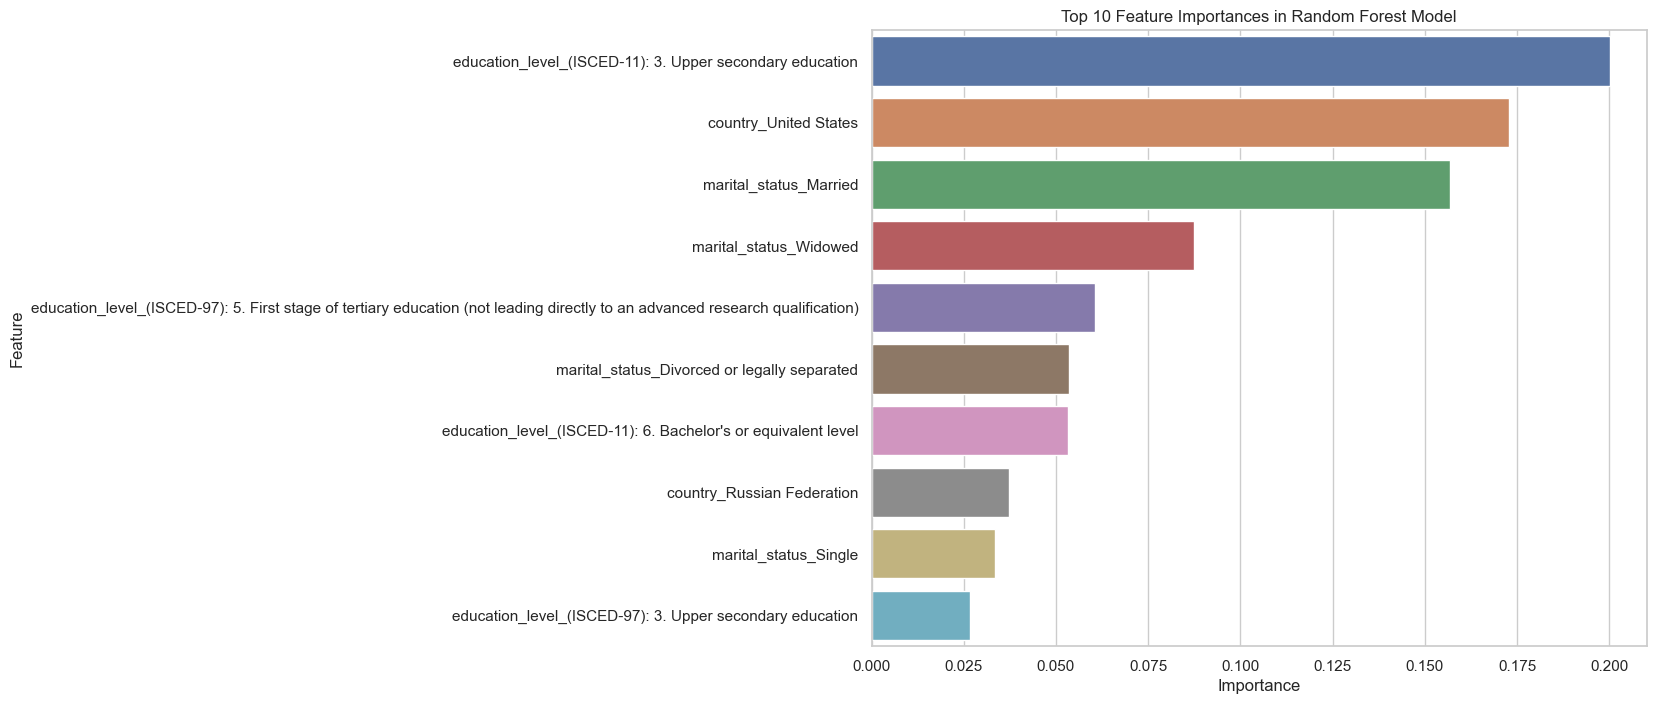

,feature,importance
123,education_level_(ISCED-11): 3. Upper secondary...,0.200028
111,country_United States,0.172652
141,marital_status_Married,0.156829
144,marital_status_Widowed,0.087420
136,education_level_(ISCED-97): 5. First stage of ...,0.060659
140,marital_status_Divorced or legally separated,0.053441
126,education_level_(ISCED-11): 6. Bachelor's or e...,0.053183
89,country_Russian Federation,0.037129
142,marital_status_Single,0.033582
134,education_level_(ISCED-97): 3. Upper secondary...,0.026573


In [119]:
# Extract feature importances from the random forest model
feature_importances = pipeline.named_steps['model'].feature_importances_

# Get the feature names after preprocessing
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

# Create a DataFrame containing feature names and their importance scores
feature_importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot a bar graph of feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the sorted feature importance DataFrame
feature_importances_df.head(10)

